# Spatial Regression (Part 2)

## Lab Session

In [1]:
library("ggplot2")
options(repr.plot.width=5, repr.plot.height=4)

publish_gg <- function(gg) {
  "Display a ggplot"
  gg_bundle <- IRdisplay::prepare_mimebundle(gg)
  IRdisplay::publish_mimebundle(gg_bundle$data, gg_bundle$metadata)
}

In [2]:
?spData::nc.sids

nc.sids {spData},R Documentation


In [3]:
# Load North Carolina Data
nc <- rgdal::readOGR(system.file("shapes/sids.shp", package = "spData")[1])

OGR data source with driver: ESRI Shapefile 
Source: "/usr/local/lib/R/site-library/spData/shapes/sids.shp", layer: "sids"
with 100 features
It has 22 fields


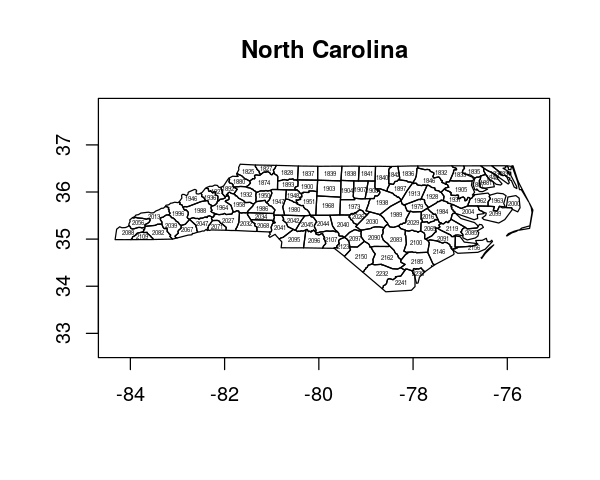

In [4]:
# Easy plot
sp::plot(nc, axes=TRUE, main="North Carolina")
text(sp::coordinates(nc), label = nc$CNTY_ID, cex = .3)

In [5]:
class(nc)

[1] "SpatialPolygonsDataFrame"
attr(,"package")
[1] "sp"

In [6]:
head(nc@data)

,CNTY_ID,AREA,PERIMETER,CNTY_,NAME,FIPS,FIPSNO,CRESS_ID,BIR74,SID74,⋯,SID79,NWBIR79,east,north,x,y,lon,lat,L_id,M_id
0,1825,0.114,1.442,1825,Ashe,37009,37009,5,1091,1,⋯,0,19,164,176,-81.67,4052.29,-81.48594,36.43940,1,2
1,1827,0.061,1.231,1827,Alleghany,37005,37005,3,487,0,⋯,3,12,183,182,-50.06,4059.70,-81.14061,36.52443,1,2
2,1828,0.143,1.630,1828,Surry,37171,37171,86,3188,5,⋯,6,260,204,174,-16.14,4043.76,-80.75312,36.40033,1,2
3,1831,0.070,2.968,1831,Currituck,37053,37053,27,508,1,⋯,2,145,461,182,406.01,4035.10,-76.04892,36.45655,1,4
4,1832,0.153,2.206,1832,Northampton,37131,37131,66,1421,9,⋯,3,1197,385,176,281.10,4029.75,-77.44057,36.38799,1,4
5,1833,0.097,1.670,1833,Hertford,37091,37091,46,1452,7,⋯,5,1237,411,176,323.77,4028.10,-76.96474,36.38189,1,4


In [7]:
# ggplot
ncfort <- fortify(nc, region = "NAME")
head(ncfort)

long,lat,order,hole,piece,id,group
-79.24619,35.86815,1,FALSE,1,Alamance,Alamance.1
-79.23799,35.83725,2,FALSE,1,Alamance,Alamance.1
-79.54099,35.83699,3,FALSE,1,Alamance,Alamance.1
-79.53782,35.89097,4,FALSE,1,Alamance,Alamance.1
-79.53058,36.23616,5,FALSE,1,Alamance,Alamance.1
-79.53051,36.24614,6,FALSE,1,Alamance,Alamance.1


In [8]:
#?dplyr::left_join

In [9]:
# Join variables
ncplot <- dplyr::left_join(ncfort, nc@data[, -c(19,20)], by=c("id"="NAME"))

Warning message:
“Column `id`/`NAME` joining character vector and factor, coercing into character vector”

In [10]:
head(ncplot)

long,lat,order,hole,piece,id,group,CNTY_ID,AREA,PERIMETER,⋯,NWBIR74,BIR79,SID79,NWBIR79,east,north,x,y,L_id,M_id
-79.24619,35.86815,1,FALSE,1,Alamance,Alamance.1,1904,0.111,1.392,⋯,1243,5767,11,1397,278,151,104.13,3997.85,1,3
-79.23799,35.83725,2,FALSE,1,Alamance,Alamance.1,1904,0.111,1.392,⋯,1243,5767,11,1397,278,151,104.13,3997.85,1,3
-79.54099,35.83699,3,FALSE,1,Alamance,Alamance.1,1904,0.111,1.392,⋯,1243,5767,11,1397,278,151,104.13,3997.85,1,3
-79.53782,35.89097,4,FALSE,1,Alamance,Alamance.1,1904,0.111,1.392,⋯,1243,5767,11,1397,278,151,104.13,3997.85,1,3
-79.53058,36.23616,5,FALSE,1,Alamance,Alamance.1,1904,0.111,1.392,⋯,1243,5767,11,1397,278,151,104.13,3997.85,1,3
-79.53051,36.24614,6,FALSE,1,Alamance,Alamance.1,1904,0.111,1.392,⋯,1243,5767,11,1397,278,151,104.13,3997.85,1,3


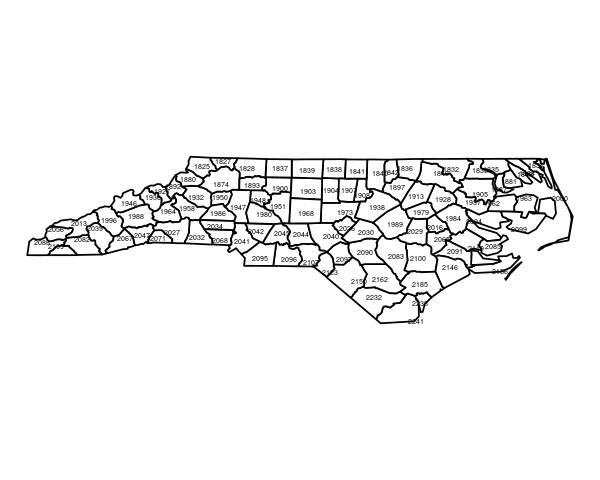

In [11]:
plt <- ggplot(ncplot, aes(x = long, y = lat, group = group)) +
    geom_polygon(fill="white", col="black") +
    geom_text(data=nc@data, aes(x=lon, y=lat, group=0, label=CNTY_ID), size=1.5) +
    coord_equal() + 
    theme_void()
publish_gg(plt)

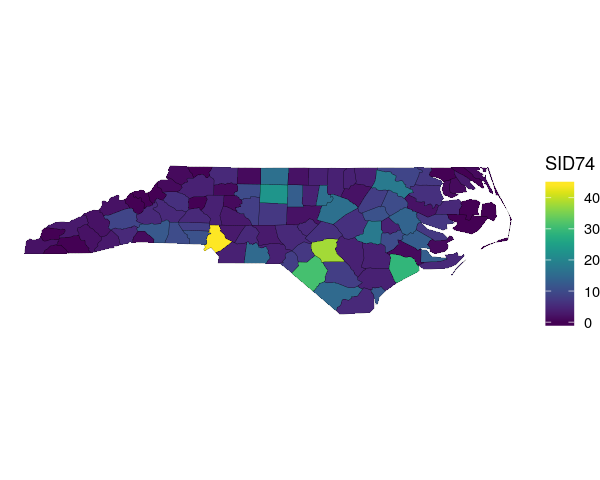

In [12]:
plt <- ggplot(ncplot, aes(x = long, y = lat, group = group)) +
    geom_polygon(aes(fill = SID74)) +
    geom_path(col = 'black', alpha = 0.5, size = 0.1) +
    viridis::scale_fill_viridis() +
    coord_equal() + 
    theme_void()
publish_gg(plt)

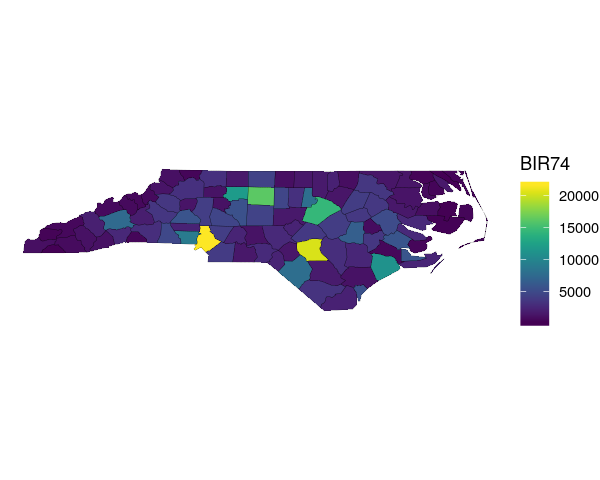

In [20]:
plt <- ggplot(ncplot, aes(x = long, y = lat, group = group)) +
    geom_polygon(aes(fill = BIR74)) +
    geom_path(col = 'black', alpha = 0.5, size = 0.1) +
    viridis::scale_fill_viridis() +
    coord_equal() + 
    theme_void()
publish_gg(plt)

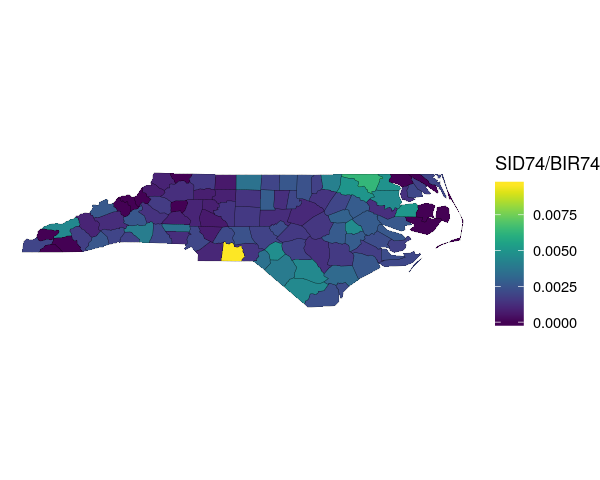

In [21]:
plt <- ggplot(ncplot, aes(x = long, y = lat, group = group)) +
    geom_polygon(aes(fill = SID74 / BIR74)) +
    geom_path(col = 'black', alpha = 0.5, size = 0.1) +
    viridis::scale_fill_viridis() +
    coord_equal() + 
    theme_void()
publish_gg(plt)

In [37]:
#Neighbors
nc_neighbours <- spdep::poly2nb(nc, row.names=nc@data$NAME)
names(nc_neighbours) <- attr(nc_neighbours, "region.id")

In [38]:
nc_neighbours

Neighbour list object:
Number of regions: 100 
Number of nonzero links: 490 
Percentage nonzero weights: 4.9 
Average number of links: 4.9 

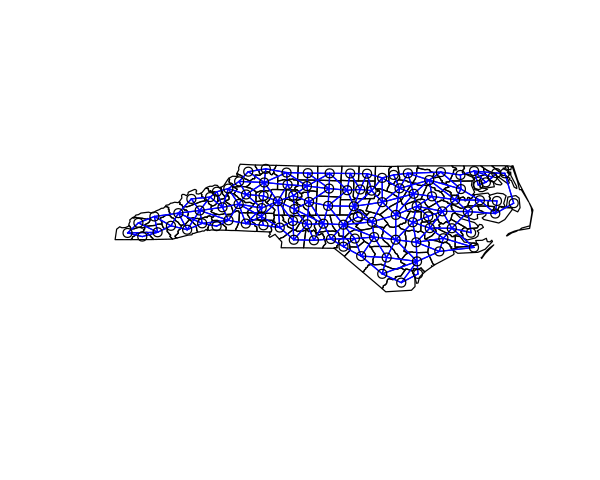

In [40]:
sp::plot(nc)
sp::plot(nc_neighbours, sp::coordinates(nc), col="blue", add=TRUE)

In [41]:
ncdf <- nc@data
ncdf$xx <- nc@data$SID74 / nc@data$BIR74

In [42]:
head(ncdf)

,CNTY_ID,AREA,PERIMETER,CNTY_,NAME,FIPS,FIPSNO,CRESS_ID,BIR74,SID74,⋯,NWBIR79,east,north,x,y,lon,lat,L_id,M_id,xx
0,1825,0.114,1.442,1825,Ashe,37009,37009,5,1091,1,⋯,19,164,176,-81.67,4052.29,-81.48594,36.43940,1,2,0.0009165903
1,1827,0.061,1.231,1827,Alleghany,37005,37005,3,487,0,⋯,12,183,182,-50.06,4059.70,-81.14061,36.52443,1,2,0.0000000000
2,1828,0.143,1.630,1828,Surry,37171,37171,86,3188,5,⋯,260,204,174,-16.14,4043.76,-80.75312,36.40033,1,2,0.0015683814
3,1831,0.070,2.968,1831,Currituck,37053,37053,27,508,1,⋯,145,461,182,406.01,4035.10,-76.04892,36.45655,1,4,0.0019685039
4,1832,0.153,2.206,1832,Northampton,37131,37131,66,1421,9,⋯,1197,385,176,281.10,4029.75,-77.44057,36.38799,1,4,0.0063335679
5,1833,0.097,1.670,1833,Hertford,37091,37091,46,1452,7,⋯,1237,411,176,323.77,4028.10,-76.96474,36.38189,1,4,0.0048209366


In [43]:
m1 <- mgcv::gam(xx ~ s(NAME, bs = "mrf", xt = list(nb = nc_neighbours)),
          data = ncdf, weights=BIR74, method = "REML", family = binomial)

In [44]:
summary(m1)


Family: binomial 
Link function: logit 

Formula:
xx ~ s(NAME, bs = "mrf", xt = list(nb = nc_neighbours))

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.23288    0.05302  -117.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
          edf Ref.df Chi.sq  p-value    
s(NAME) 35.18     99  110.4 1.72e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.557   Deviance explained = 70.1%
-REML = 230.71  Scale est. = 1         n = 100

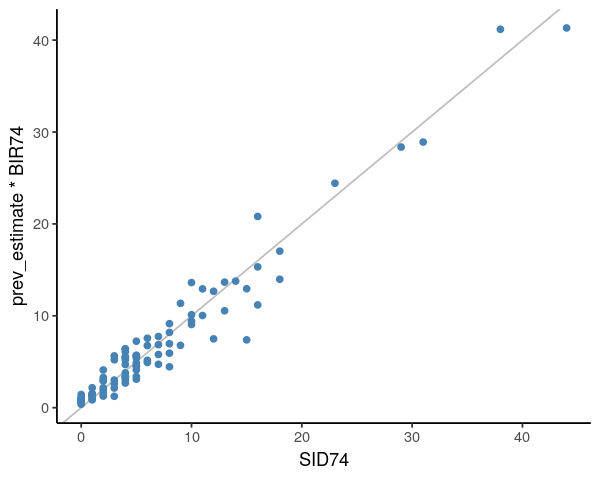

In [45]:
ncdf$prev_estimate <- mgcv::predict.gam(m1, newdata = ncdf, type="response")

plt <- ggplot(ncdf, aes(SID74, prev_estimate * BIR74)) +
        geom_abline(intercept = 0, slope = 1, col="grey") +
        geom_point(col="steelblue") +
        theme(panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              panel.background = element_blank(), 
              axis.line = element_line(colour = "black"))

publish_gg(plt)

In [46]:
ncplot <- dplyr::left_join(ncfort, ncdf[, -c(19,20)], by=c("id"="NAME"))

Warning message:
“Column `id`/`NAME` joining character vector and factor, coercing into character vector”

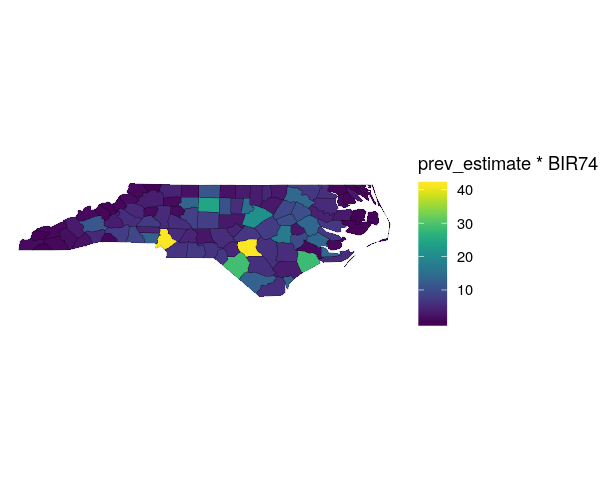

In [47]:
plt <- ggplot(ncplot, aes(x = long, y = lat, group = group)) +
    geom_polygon(aes(fill = prev_estimate * BIR74)) +
    geom_path(col = 'black', alpha = 0.5, size = 0.1) +
    viridis::scale_fill_viridis() +
    coord_equal() +
    theme_void()
publish_gg(plt)

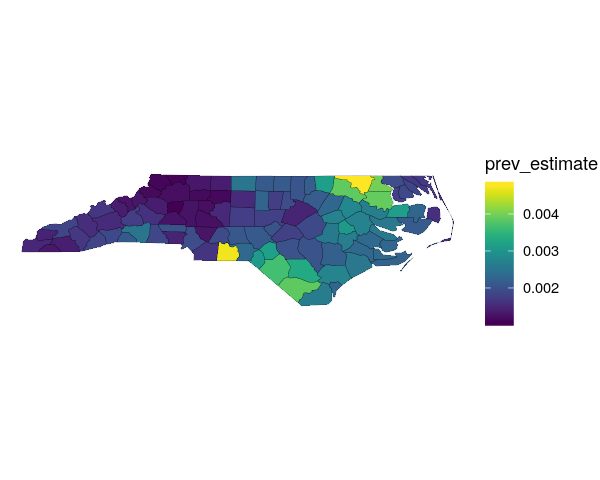

In [48]:
plt <- ggplot(ncplot, aes(x = long, y = lat, group = group)) +
    geom_polygon(aes(fill = prev_estimate)) +
    geom_path(col = 'black', alpha = 0.5, size = 0.1) +
    viridis::scale_fill_viridis() +
    coord_equal() +
    theme_void()
publish_gg(plt)

In [49]:
# Now with a Poisson model
m2 <- mgcv::gam(SID74 ~ offset(log(BIR74)) + s(NAME, bs = "mrf", xt = list(nb = nc_neighbours)),
          data = ncdf, method = "REML", family = poisson)

In [ ]:
# y = beta_0 + beta_1 x + z
# y ~ x + offset(z)

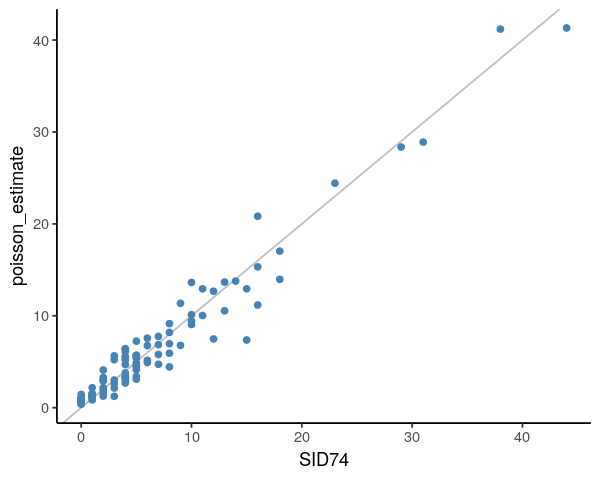

In [50]:
ncdf$poisson_estimate <- mgcv::predict.gam(m2, newdata = nc@data, type="response")

plt <- ggplot(ncdf, aes(SID74, poisson_estimate)) +
        geom_abline(intercept = 0, slope = 1, col="grey") +
        geom_point(col="steelblue") +
        theme(panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              panel.background = element_blank(), 
              axis.line = element_line(colour = "black"))

publish_gg(plt)

Warning message:
“Column `id`/`NAME` joining character vector and factor, coercing into character vector”

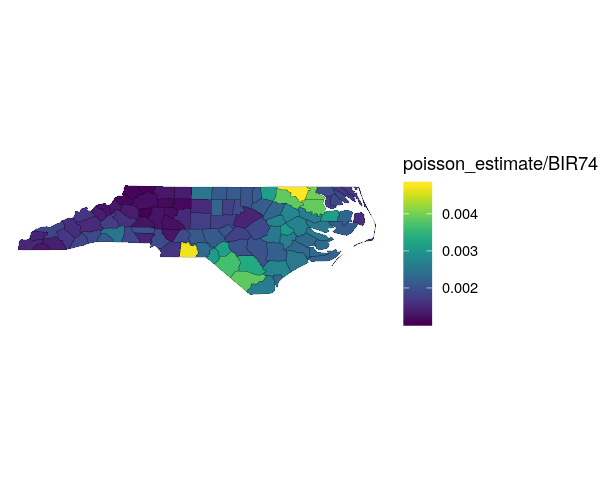

In [51]:
ncplot <- dplyr::left_join(ncfort, ncdf[, -c(19,20)], by=c("id"="NAME"))
plt <- ggplot(ncplot, aes(x = long, y = lat, group = group)) +
    geom_polygon(aes(fill = poisson_estimate/BIR74)) +
    geom_path(col = 'black', alpha = 0.5, size = 0.1) +
    viridis::scale_fill_viridis() +
    coord_equal() +
    theme_void()
publish_gg(plt)